Osnabrück University - Machine Learning (Summer Term 2020) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 08

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, June 27, 2020**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

The second half of this sheet and the following Sheet 09 will be a recap of previous topics, to help you prepare for the final exam.

Also if you hit any question that should be discussed in more detail in the next practice session, please let us know.

## Assignment 0: Math recap (Conditional Probability) [0 Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** Explain the idea of conditional probability. How is it defined?

Conditional probability is the probability that an event A happens, given that another event B happened.
For example:
The probability of rain is $$P(weather="rain") = 0.3$$ But if you observe, if the street is wet you would get the conditional probability $$P(weather= "rain" |~ street="wet") = 0.95$$
The definition is:
$$ P(A|B) = \frac{P(A,B)}{P(B)} $$

**b)** What is Bayes' theorem? What are its applications?

Bayes Theorem states:
$$ P(B|A) = \frac{P(A|B) \cdot P(B)}{P(A)} $$

The most important application is in reasoning backwards from event to cause (from data to parameters of your distribution):

$$ P(\Theta|Data) = \frac{P(Data|\Theta)P(\Theta)}{P(Data)}$$

**c)** What does the law of total probability state? 

The law of total probability states, that the probabilty of an event occuring is the same as the sum of the probabilities of this event occuring together with all possible states of an other event:
$$P(A) = \sum_b P(A,B=b) = \sum_b P(A|B=b) P(B=b)$$

## Assignment 1: MLP and RBFN [10 Points]

This exercise is aimed at deepening the understanding of Radial Basis Function Networks and how they relate to Multilayer Perceptrons. Not all of the answers can be found directly in the slides - so when answering the (more algorithmic) questions, first take a minute and think about how you would go about solving them and if nothing comes to mind search the internet for a little bit. If you are interested in a real life application of both algorithms and how they compare take a look at this paper: [Comparison between Multi-Layer Perceptron and Radial Basis Function Networks for Sediment Load Estimation in a Tropical Watershed](http://file.scirp.org/pdf/JWARP20121000014_80441700.pdf)

![Schematic of a RBFN](RBFN.png)

We have prepared a little example that shows how radial basis function approximation works in Python. This is not an example implementation of a RBFN but illustrates the work of the hidden neurons.

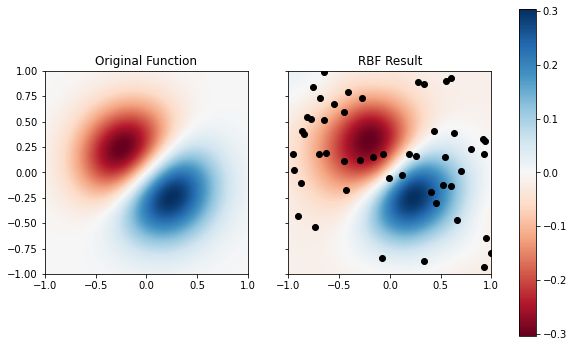

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import uniform

from scipy.interpolate import Rbf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm


def func(x, y):
    """
    This is the example function that should be fitted.
    Its shape could be described as two peaks close to
    each other - one going up, the other going down
    """
    return (x + y) * np.exp(-4.0 * (x**2 + y**2))


# number of training points (you may try different values here)
training_size = 50

# sample 'training_size' data points from the input space [-1,1]x[-1,1] ...
x = uniform(-1.0, 1.0, size=training_size)
y = uniform(-1.0, 1.0, size=training_size)

# ... and compute function values for them.
fvals = func(x, y)

# get the aprroximation via RBF
new_func = Rbf(x, y, fvals)


# Plot both functions:
# create a 100x100 grid of input values
x_grid, y_grid = np.mgrid[-1:1:100j, -1:1:100j]

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))
# This plot represents the original function
f_orig = func(x_grid, y_grid)
img = ax[0].imshow(f_orig, extent=[-1, 1, -1, 1], cmap='RdBu')
ax[0].set(title='Original Function')
# This plots the approximation of the original function by the RBF
# if the plot looks strange try to run it again, the sampling
# in the beginning is random
f_new = new_func(x_grid, y_grid)
plt.imshow(f_new, extent=[-1, 1, -1, 1], cmap='RdBu')
ax[1].set(title='RBF Result', xlim=[-1, 1], ylim=[-1, 1])
# scatter the datapoints that have been used by the RBF
plt.scatter(x, y, color='black')
fig.colorbar(img, ax=ax)
plt.show()

### Radial Basis Function Networks

#### What are radial basis functions?

Radial basis functions are all functions that fullfill the following criteria:

The value of the function for a certain point depends only on the distance of that point to the origin or some other fixed center point. In mathematical formulation that spells out to: 
$\phi (\mathbf {x} )=\phi (\|\mathbf {x} \|)$  or  $\phi (\mathbf {x} ,\mathbf {c} )=\phi (\|\mathbf {x} -\mathbf {c} \|)$. Notice that it is not necessary (but most common) to use the norm as the measure of distance.

#### What is the structure of a RBFN? You may also use the notion from the above included picture.

RBFN's are networks that contain only one hidden layer. The input is connected to all the hidden units. Each of the hidden units has a different radial basis function that is *sensitive* to ranges in the input domain. The output is then a linear combination of the outpus ot those functions.

#### How is a RBFN trained?

Note: all input data has to be normalized.

Training a RBFN is a two-step process. First the functions in the hidden layer are initialized. This can be either done by sampling from the input data or by first performing a k-means clustering, where k is the number of nodes that have to be initialzed.

The second step fits a linear model with coefficients $w_{i}$ to the hidden layer's outputs with respect to some objective function. The objective function depends on the task: it can be the least squares function, or the weights can be adapted by gradient descent.

### Comparison to the Multilayer Perceptron

#### What do both models have in common? Where do they differ?

|RBFN                 |MLP                  | 
|---------------------|---------------------|
| non-linear layered feedforward network|non-linear layered feedforward network| 
| hidden neurons use radial basis functions, output neurons use linear function| input, hidden and output-layer all use the same activation function| 
| universal approximator |   universal approximator |
| learning usually affects only one or some RBF | learning affects many weights throught the network|

#### How can classification in both networks be visualized?

![Classification](Solution_Classification.png)

#### When would you use a RBFN instead of a Multilayer Perceptron?

RBFNs are more robust to noise and should therefore be used when the data contains false-positives.

## Recap 1: Concept Learning [2 Points]

### a) Concept Learning

What is Concept Learning? Is it supervised? Is it local?

Concept learning aims at acquiring knowledge that allows to distinguish exemplars from non exemplars of a given category (concept). It can be formalized as learning a unary predicate $p_c$ on the domain $X$ or equivalently an indicator function $c:X\to\{0,1\}$.

Concept learning is usually supervised: the teacher tells the learner if an example falls under the concept or not.

As soon as there are is some metric given on the data, there may be local and global concept learners. One may for example use a nearest neighbor learner (local) or a multilayer-perceptron (global) to learn concepts.

### b) Find-S
Describe the Find-S Algorithm in pseudo code. What is its inductive bias? What are its advantages and drawbacks?

    1. Initialize $h$ to the most specific hypothesis in H.
    2. For each positive training instance x do
           For each attribute constraint $a_i$ in h do
               If ($a_$i is not satisfied by x) then
                   Replace $a_i$ in h by the next more general constraint
                     that is satisfied by x.
               End if
           End for
       End for
    3. Output h.

Inductive Bias: The target concept can be described in its hypothesis space (in our case: it is a conjunction of features). All instances are negative instances unless demonstrated otherwise.

Drawback: it does not take negative instances into account.

### c) Hypotheses space

What is the hypotheses space for Candidate-Elimination used in the lecture?

The hypothesis space for Candidate-Elimination spreads between the most general and most specific hypotheses. The other hypotheses are made up by conjunction of features which biases the learner and makes it impossible to find a disjunctive solution.

The version space on the other hand is a subset of the hypotheses space. It is the set of all hypotheses between and including the general and the specific boundary.



## Recap 2: Decision Trees [2 Points]

### a) Overfitting
What is overfitting? How can it be avoided?

Overfitting means an overly specific adaptation of the learner to the training data. Not only the general structure of the training data has been learned, but also its specific noise, i.e. artifacts, are learned and hence the learner looses the capability to generalize and work on other data.

Overfitting can be detected by using a separate test data set. If the error on the test data increases during training, this indicates overfitting.

### b) Pruning

Name one method for pruning a decision tree and describe it!

Pruning can be applied to reduce overfitting of a decision tree. Two types of pruning have been introduced in the lecture:

*Reduced error pruning:* removes nodes from the decision tree to achieve better generalization on the test set.

*Rule based pruning:* translate the decision tree into a set of rules and then prune an individual rule by removing any preconditions that result in improving its accuracy on the
validation set.

### c) Information gain
What are entropy and information gain? Provide explanation and formulae. How are they used in ID3?

Entropy measures the inhomogeneity of a data set (the minimal number of bits needed to encode elements from the set) 
$$E(S) = -p_{+}\log_2 p_{+} - p_{-}\log_2p_{-}$$
where $p_{+}$ denotes the fraction of positive and $p_{-}$ that of negative examples in the data set. A set $S$ with only positive (or only negative) examples would have no entropy (i.e. $E(S)=0$), while a set with the same number of positive and negative examples has maximal entropy ($E(S)=1$).

Information gain is the expected reduction in entropy due to splitting the data set $S$ based on one attribute $A$: denote for every value $v\in\operatorname{Values}(A)$ the subset of elements from $S$ where $A=v$ by $S_v$. Then the information gain is given by
$$\operatorname{Gain}(S,A) = E(S) - \sum_{v\in\operatorname{Values}(A)}E(S_v)\cdot\frac{|S_v|}{|S|}$$
that is, from the entropy of $S$ the entropy values for $S_v$ are subtracted and weighted by their respective sizes. If the subsets $S_v$ are all homogeneous ($E(S_v)=0$), then the information gain is maximal, namely $E(S)$, i.e. the data set can be fully explained by the single attribute $A$. On the other hand, if all $S_v$ have maximal entropy,  no information is gained by splitting based on $A$. In practice, something between these extremes will be the case.

ID3 places the node with highest information gain at the root of the decision tree.

## Recap 3: Data Mining [2 Points]

### a) Missing values

How can you deal with missing values? Name an important algorithm and explain how to use it.

Data records with missing values may be simply ignored, or one may try to "fix" the record by inserting artificial values into empty slots. The most simple way is to insert just zeros (or some other value) but this will lead to poor data quality. Better approaches try to use statistical properties of the data set to introduce "natural" fillers. One approach is to use the mean of the missing attribute, however this ignores possible dependencies between the different attributes. A more sophisticated approach is expectation maximization (EM) to estimate the joint probability distribution of all attributes in an iterative process. Once it is computed, one can use it to determine the most likely value for the missing datapoint.

### b) Outliers

What are outliers? Can we detect them? If so, how?

An outlier is a value that seemingly does not belong to the rest of the data. It is probably caused by some measurement error (but it may also reflect some real phenomenon).

A simple method to detect outliers is to consider their distances from the mean (or median) of the full data set. If this is too large (e.g. greater than 3 standard deviations), the data point is considered to be an outlier (z-test). The Rosner test iteratively removes those outliers until the dataset does not contain anymore of them.

### c) Expectation Maximization
What does the Q-function express in the EM algorithm?

The EM algorithm aims at finding model parameters $\theta$ that best explain observed data $x$ (which may have missing values $h$). It does so by alternating steps of calculating the expected value of the (log) likelihood function $L(\theta,x,h)$, using the current estimated parameters $\theta_t$ (E step), and then finding parameter values $\theta'$ that maximize this quantity (M step). The $Q$-function expresses the expected likelihood function:
$$Q(\theta\mid\theta_{t}) = E_{h\mid x,\theta_t}[\log L(\theta,x,h)] = \int P(h\mid x,\theta_t)\cdot \log P(h\mid x,\theta)\operatorname{d} h+\log P(x\mid\theta)$$

## Recap 4: Clustering [4 Points]

### a) Clustering

Explain the difference between single-linkage and complete-linkage clustering.

Single-linkage clustering is based on the *minimum distance* that defines the distance between two clusters from the distance of their closest points. Single-linkage clustering tends to chaining.

Complete-linkage clustering is based on the *maximum distance* that defines the distance of two clusters to be the maximal distance of two of their points. Complete linkage clustering prefers compact clusters.

### b) Metrics

Name three different distance measures and briefly explain them. Check the metric axioms for one of them.

* Hamming distance: the number of positions where two strings of equal length differ
* Chebyshev distance (also: maximum distance): maximal absolute difference in a single coordinate.
* p-norm: family of norms, defined by the formula $\sqrt[p](\sum_{i=1}^{L}|x_i-y_i|^p)$. Important special cases: city block (aka Manhattan, p=1), euclidean distance (p=2)
* Jaccard distance: for binary attributes

Metric axioms for Chebyshev distance $d(\mathbf{x},\mathbf{y}) := \max_{i=1,\ldots,L}|x_i-y_i|$:
1. Symmetry: Here we use that the absolute value of the difference is symmetric: $|a-b| = |b-a|$, hence $d(\mathbf{x},\mathbf{y}) = \max_{i=1,\ldots,L}|x_i-y_i| = \max_{i=1,\ldots,L}|y_i-x_i| = d(\mathbf{y},\mathbf{x})$
2. Coincidence (identity of indiscernibles): $d(\mathbf{x},\mathbf{x}) = \max_{i=1,\ldots,L}|x_i-x_i| = 0$
3. Triangle equation: Here we apply that the triangle inequality holsd for the absolute value of the difference: $|a-c|+|c-b|\geq|a-b|$, and hence
\begin{align}
  d(\mathbf{x},\mathbf{z}) + d(\mathbf{z},\mathbf{y}) =
\max_{i=1,\ldots,L}|x_i-z_i| + \max_{i=1,\ldots,L}|z_i-y_i| &
 \geq \max_{i=1,\ldots,L}(|x_i-z_i| + |z_i-y_i|) \\
& \geq \max_{i=1,\ldots,L}(|x_i-y_i|) = d(\mathbf{x},\mathbf{y})
\end{align}


### c) Mixture models

What is a mixture model? Explain. Can you provide a formula?

A mixture model describes a two-step process to mix different (simple) data distributions. Such an approach can be used to model a large population with different subpopulations, each which individual characteristics.

Formally, one provides a specific distribution $P(X\mid Z=z)$ for every subpopulation $z$. These are mixed according to the probability $P(Z=z)$ to select an individual from that subpopulation, i.e.
$$P(X=x) = \sum_{z}P(Z=z)\cdot P(X=x\mid Z=z)$$


## Recap 5: Dimension Reduction [2 Points]

### a) Visualization

Name three different data visualization techniques to visualize high dimensional data. Explain one in detail.

* a *scatterplot matrix* shows 2D projections of the data for all combination of axes
* *Chernoff faces:* map parameters to facial features
* *parallel coordinates:* map the different data dimensions to different x-coordinates and plot the corresponding values at the y-axis.

### b) PCA

Draw a few data points (ASCII arts or on a sheet of paper) and mark the principal components. What are the principal components?

Principal components form a set of linear independent vectors, pointing into the direction of the largest variance. They can be scaled by the squareroot of the corresponding eigenvalue(=standard deviation). Then their length corresponds to the variance in that direction.

### c) Covariance matrix
What does a covariance matrix express? How is it computed from data? How is it used in PCA?

The covariance matrix contains the covariance values for all pairs of coordinates. A positive covariance value means that high values for the first coordinate of the pair correspond to high values for the second coordinate of the pair. A negative covariance value expresses a correspondence of high values in the first coordinate with low values in the second coordinate. A value of $0$ means, that the values of the two coordinates do not correspond to each other.

Given a set of $n$ data points in a $d$-dimensional data space as an $n\times d$-matrix $D$, the covariance matrix is computed as $$C=\frac{1}{n-1}(D-\mu)\cdot(D-\mu)^T$$ where $\mu$ denotes the mean vector of the data set.

In PCA, the principal components are computed as eigenvectors of the covariance matrix.